In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\LEARNING\GCP\MLOPS FIRST PROJECT\mygcpenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')   

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN04969,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,INN34541,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,INN36109,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,INN01554,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,INN24975,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [5]:
cols = df.columns
for i in cols:
    print(i, "--",  df[i].isnull().sum())

Booking_ID -- 0
no_of_adults -- 0
no_of_children -- 0
no_of_weekend_nights -- 0
no_of_week_nights -- 0
type_of_meal_plan -- 0
required_car_parking_space -- 0
room_type_reserved -- 0
lead_time -- 0
arrival_year -- 0
arrival_month -- 0
arrival_date -- 0
market_segment_type -- 0
repeated_guest -- 0
no_of_previous_cancellations -- 0
no_of_previous_bookings_not_canceled -- 0
avg_price_per_room -- 0
no_of_special_requests -- 0
booking_status -- 0


In [6]:
size = df.shape[0]
print("Total number of rows in the dataset: ", size)
size = df.shape[1]
print("Total number of columns in the dataset: ", size)
dimension = df.shape
print("Dimension of the dataset: ", dimension)

Total number of rows in the dataset:  29020
Total number of columns in the dataset:  19
Dimension of the dataset:  (29020, 19)


In [7]:
df.drop(columns=['Booking_ID'],inplace=True)

In [8]:
df.shape[1]

18

In [9]:
df.duplicated().sum() # check for duplicates

np.int64(7692)

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(21328, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df["no_of_adults"].value_counts()

no_of_adults
2    15454
1     3961
3     1802
0       97
4       14
Name: count, dtype: int64

<h2>Data is imbalanced </h2>

In [14]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)
print( cat_cols)
print("Numerical columns: ", num_cols)


['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical columns:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [15]:
len(cat_cols), len(num_cols)

(4, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21328 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21328 non-null  int64  
 1   no_of_children                        21328 non-null  int64  
 2   no_of_weekend_nights                  21328 non-null  int64  
 3   no_of_week_nights                     21328 non-null  int64  
 4   type_of_meal_plan                     21328 non-null  object 
 5   required_car_parking_space            21328 non-null  int64  
 6   room_type_reserved                    21328 non-null  object 
 7   lead_time                             21328 non-null  int64  
 8   arrival_year                          21328 non-null  int64  
 9   arrival_month                         21328 non-null  int64  
 10  arrival_date                          21328 non-null  int64  
 11  market_segment_type 

<h2> Data analysis

In [17]:
df_copy = df.copy(deep=True)

In [18]:
df_copy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


<h3> Univariate analysis

In [19]:
def num_plot_dist(df,no_features):
    fig , axis  = plt.subplots(len(no_features),2,figsize=(15,5*len(no_features)))
    if len(no_features) == 1:
        axis = [axis]
    for i , column in enumerate(no_features):
        sns.histplot(data=df,x=column,ax=axis[i][0], kde=True,palette='Blues')
        axis[i][0].set_title(f'Histogram of {column}')
        sns.boxplot(data=df,x=column,ax=axis[i][1],palette='Blues')
        axis[i][1].set_title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\1618654278.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=column,ax=axis[i][0], kde=True,palette='Blues')
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\1618654278.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,ax=axis[i][1],palette='Blues')
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\1618654278.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=column,ax=axis[i][0], kde=True,palette='Blues')
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\1618654278.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(da

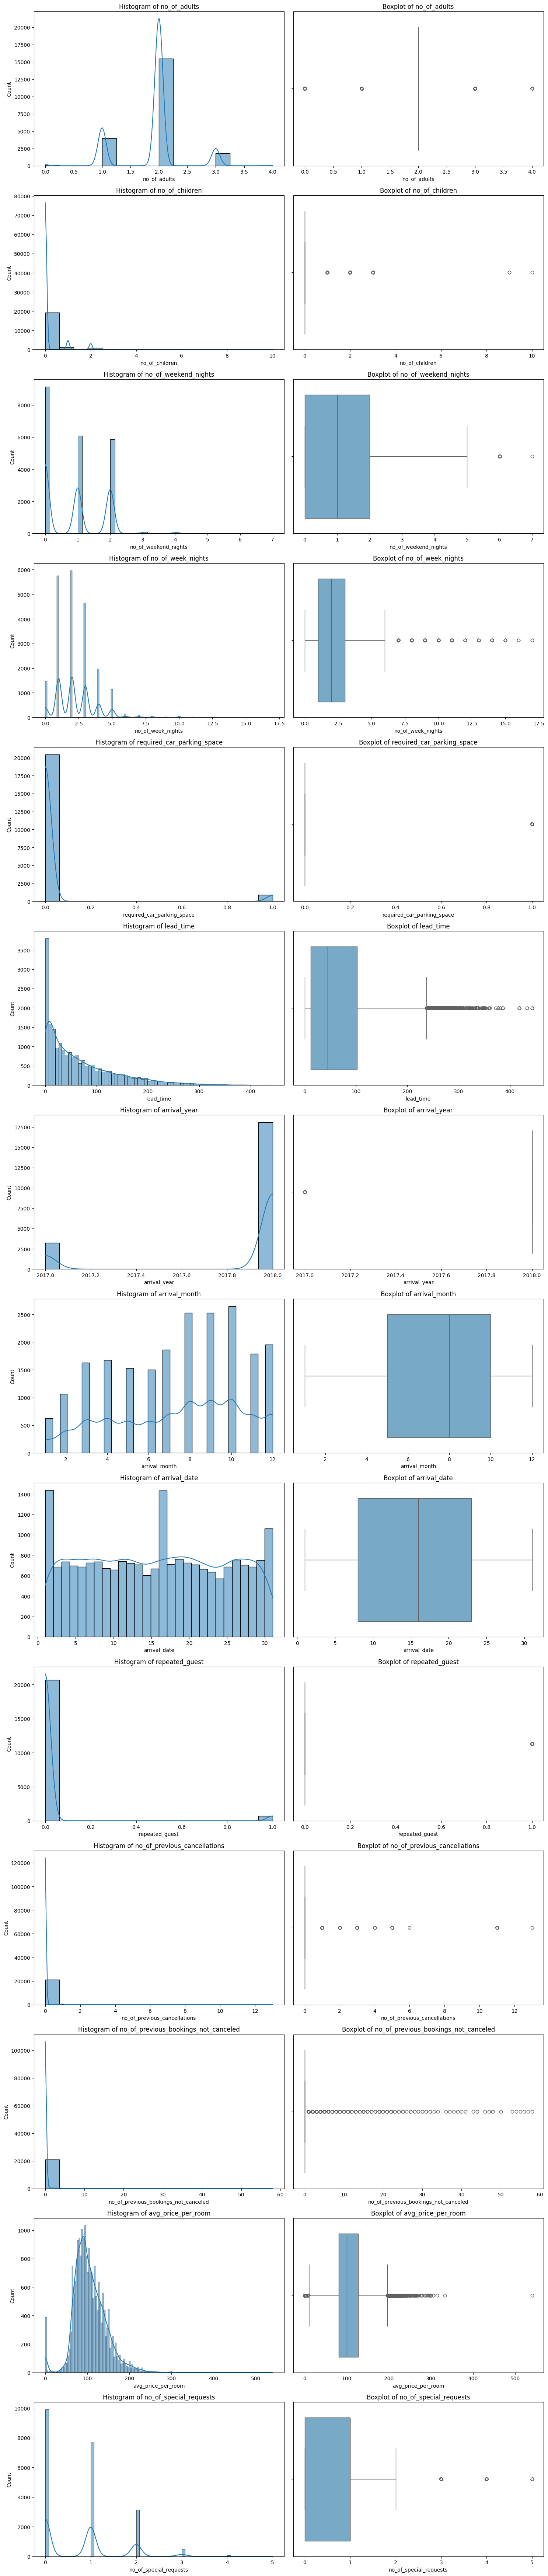

In [20]:
num_plot_dist(df_copy,num_cols)

<h3> Univariate analysis - Cat columns

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\3228706327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy,x=cat_feature,palette='Blues')


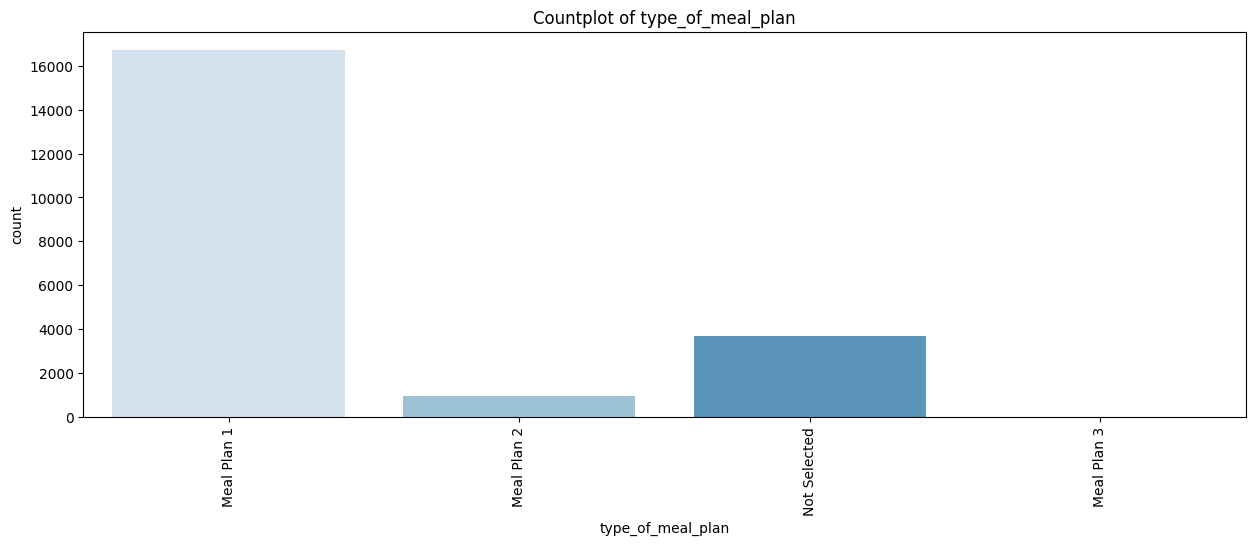

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\3228706327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy,x=cat_feature,palette='Blues')


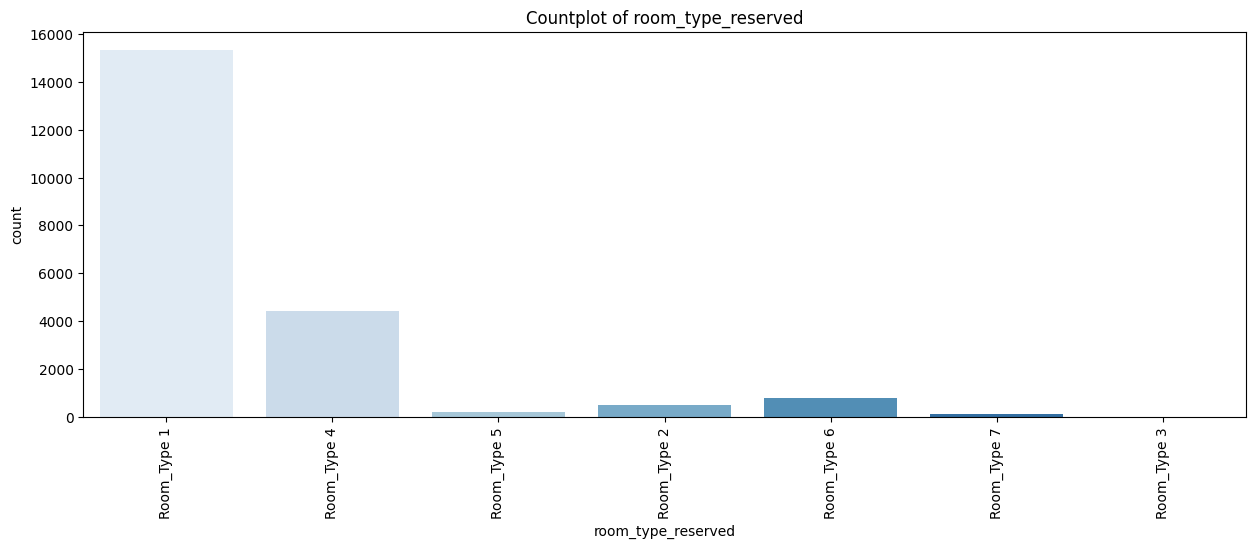

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\3228706327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy,x=cat_feature,palette='Blues')


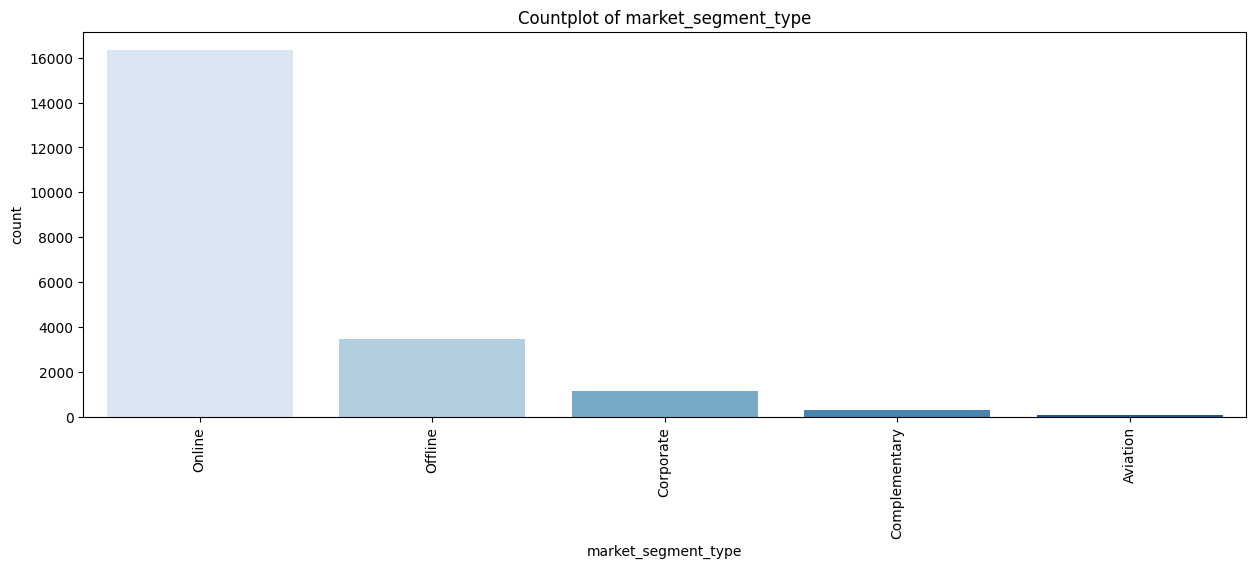

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\3228706327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy,x=cat_feature,palette='Blues')


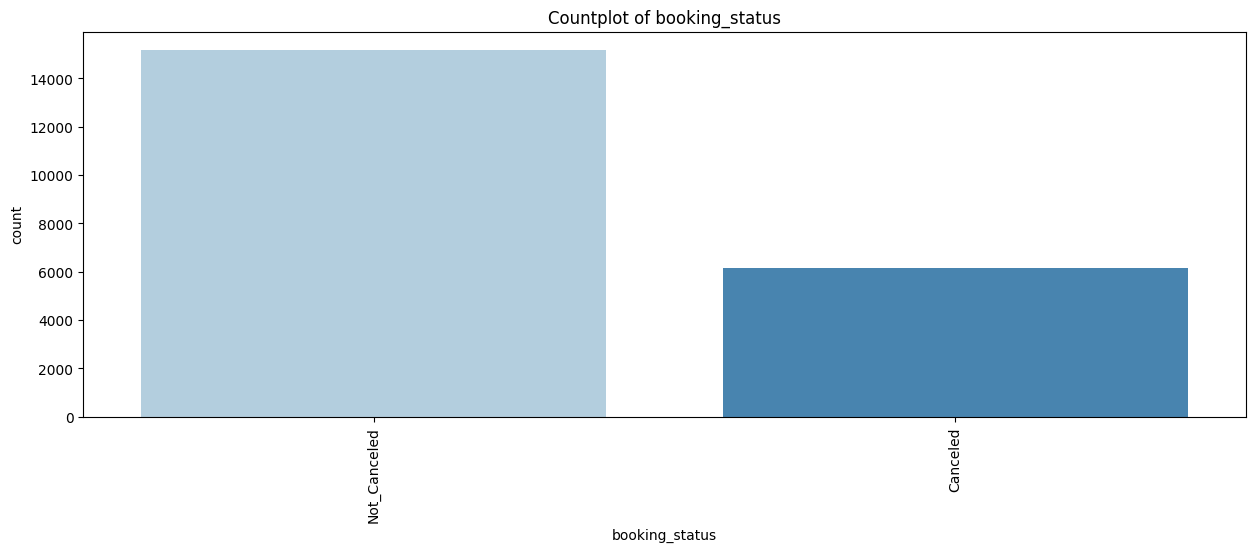

In [21]:
for cat_feature in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df_copy,x=cat_feature,palette='Blues')
    plt.title(f'Countplot of {cat_feature}')
    plt.xticks(rotation=90)
    plt.show()

<h3> Bivariate analysis

In [22]:
def plot_bivariate_num(df,target_col,num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2 
    fig, axis = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axis = axis.flatten()
    for i , column in enumerate(num_features):
        sns.boxplot(data=df,x=column,y=target_col,ax=axis[i],palette='Blues')
        axis[i].set_title(f'Boxplot of {target_col} vs {column}')
    plt.tight_layout()
    plt.show()

In [23]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\588707194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y=target_col,ax=axis[i],palette='Blues')
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\588707194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y=target_col,ax=axis[i],palette='Blues')
C:\Users\HP\AppData\Local\Temp\ipykernel_11896\588707194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y=target_col,ax=axis[i],palette='Blues')
C:\Users\HP\AppData\Local\Temp\ipykernel_11896

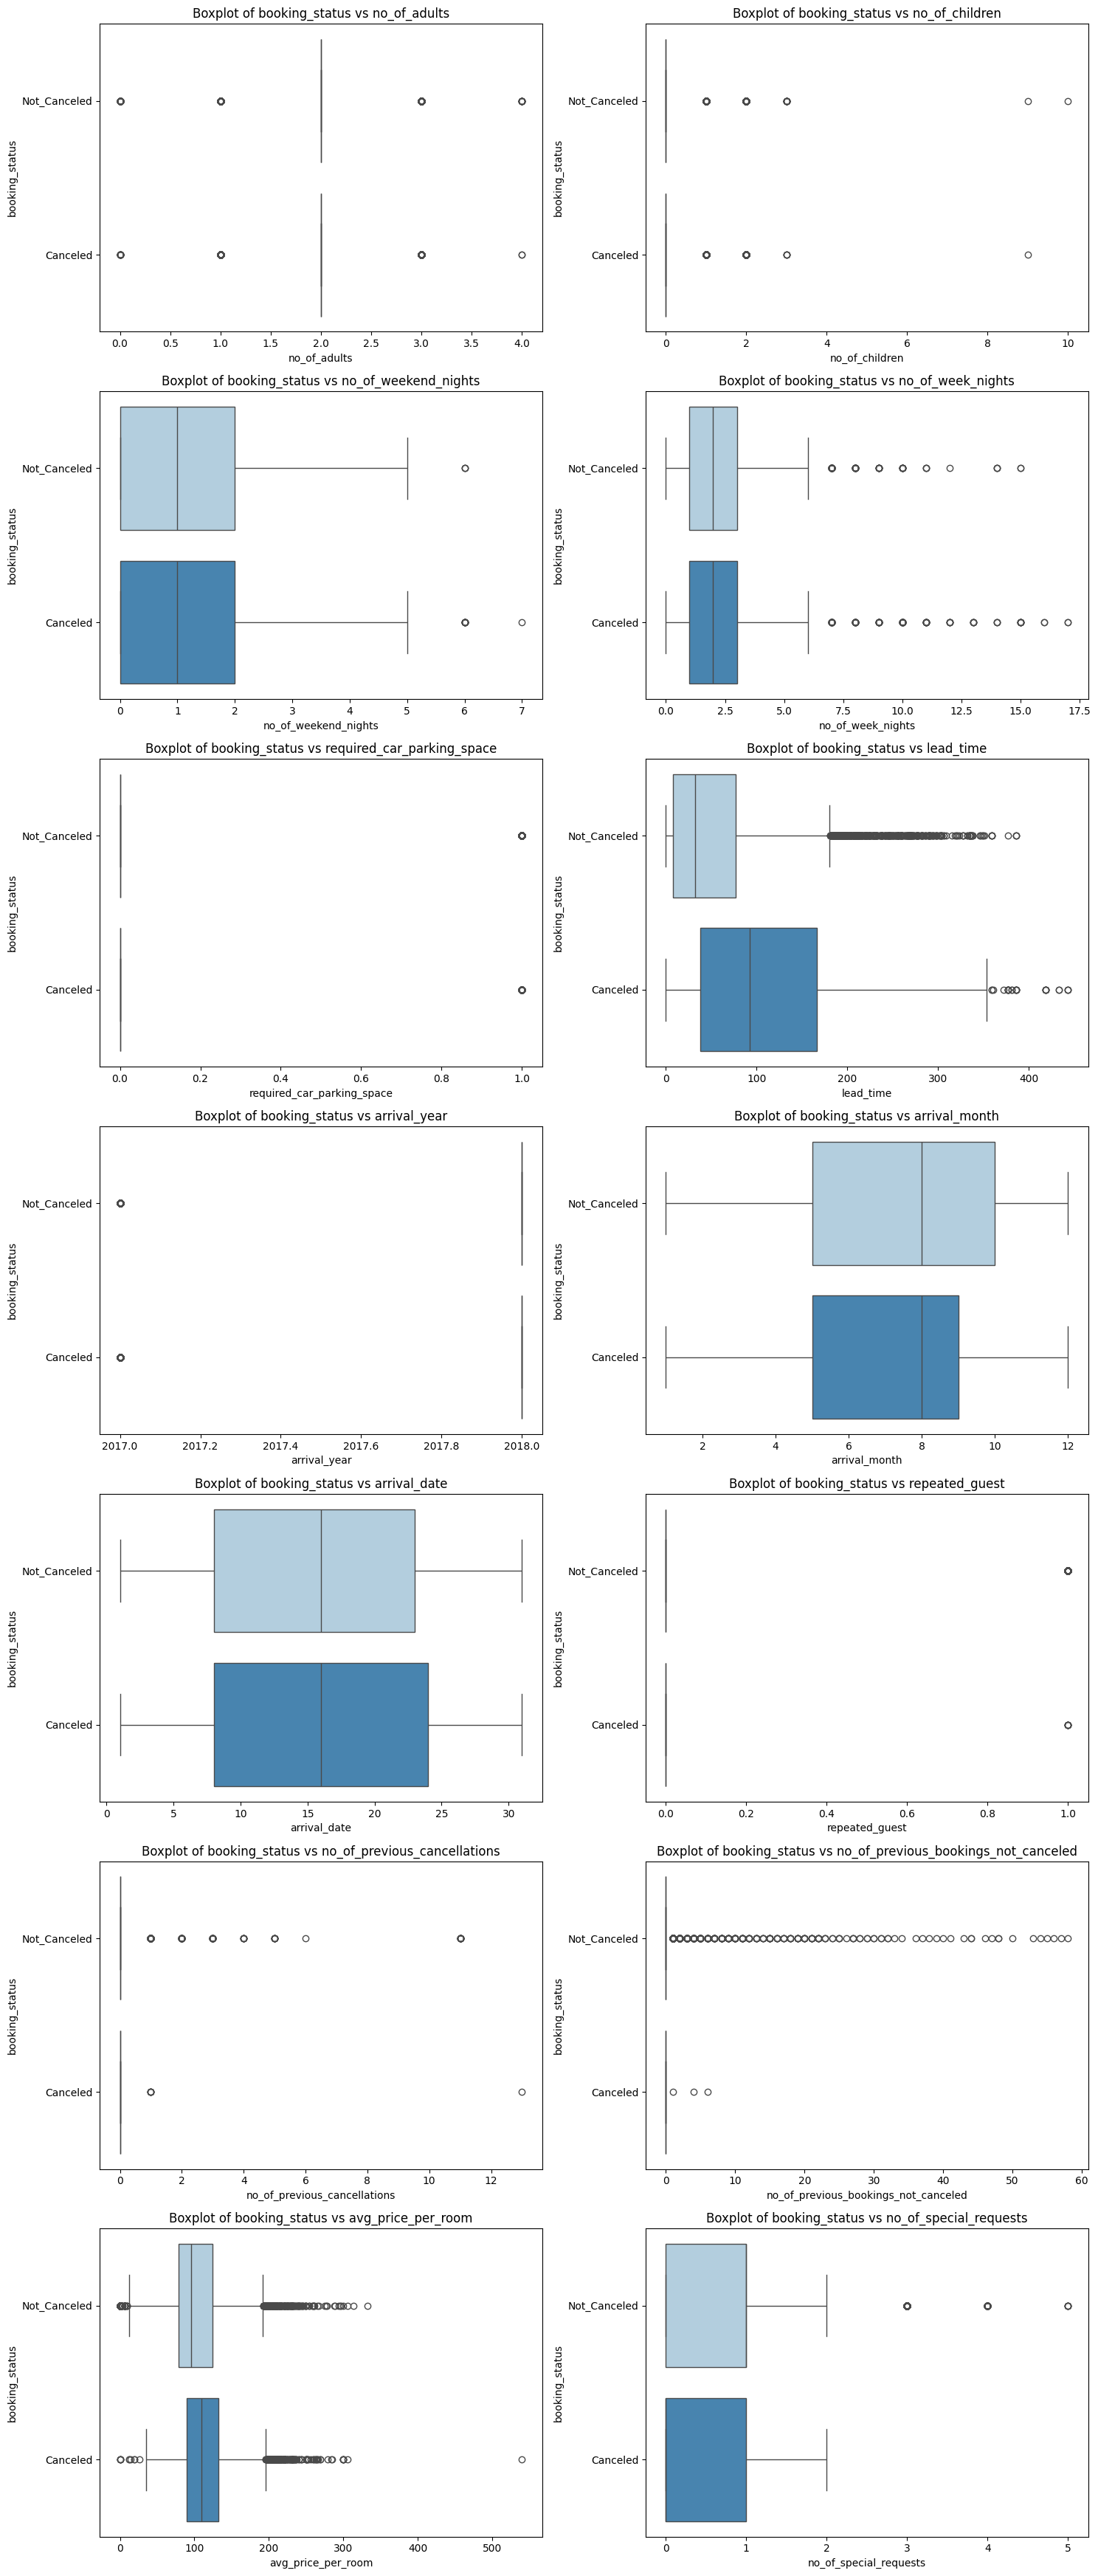

In [24]:
plot_bivariate_num(df_copy,'booking_status',num_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_11896\3227364173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_copy,x='arrival_month',y='avg_price_per_room',palette='Blues')


<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

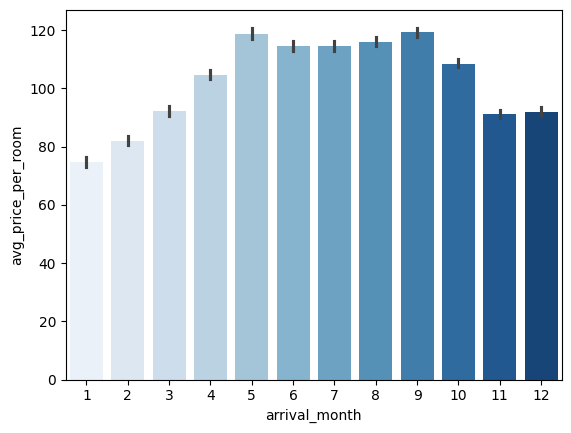

In [25]:
sns.barplot(data=df_copy,x='arrival_month',y='avg_price_per_room',palette='Blues')

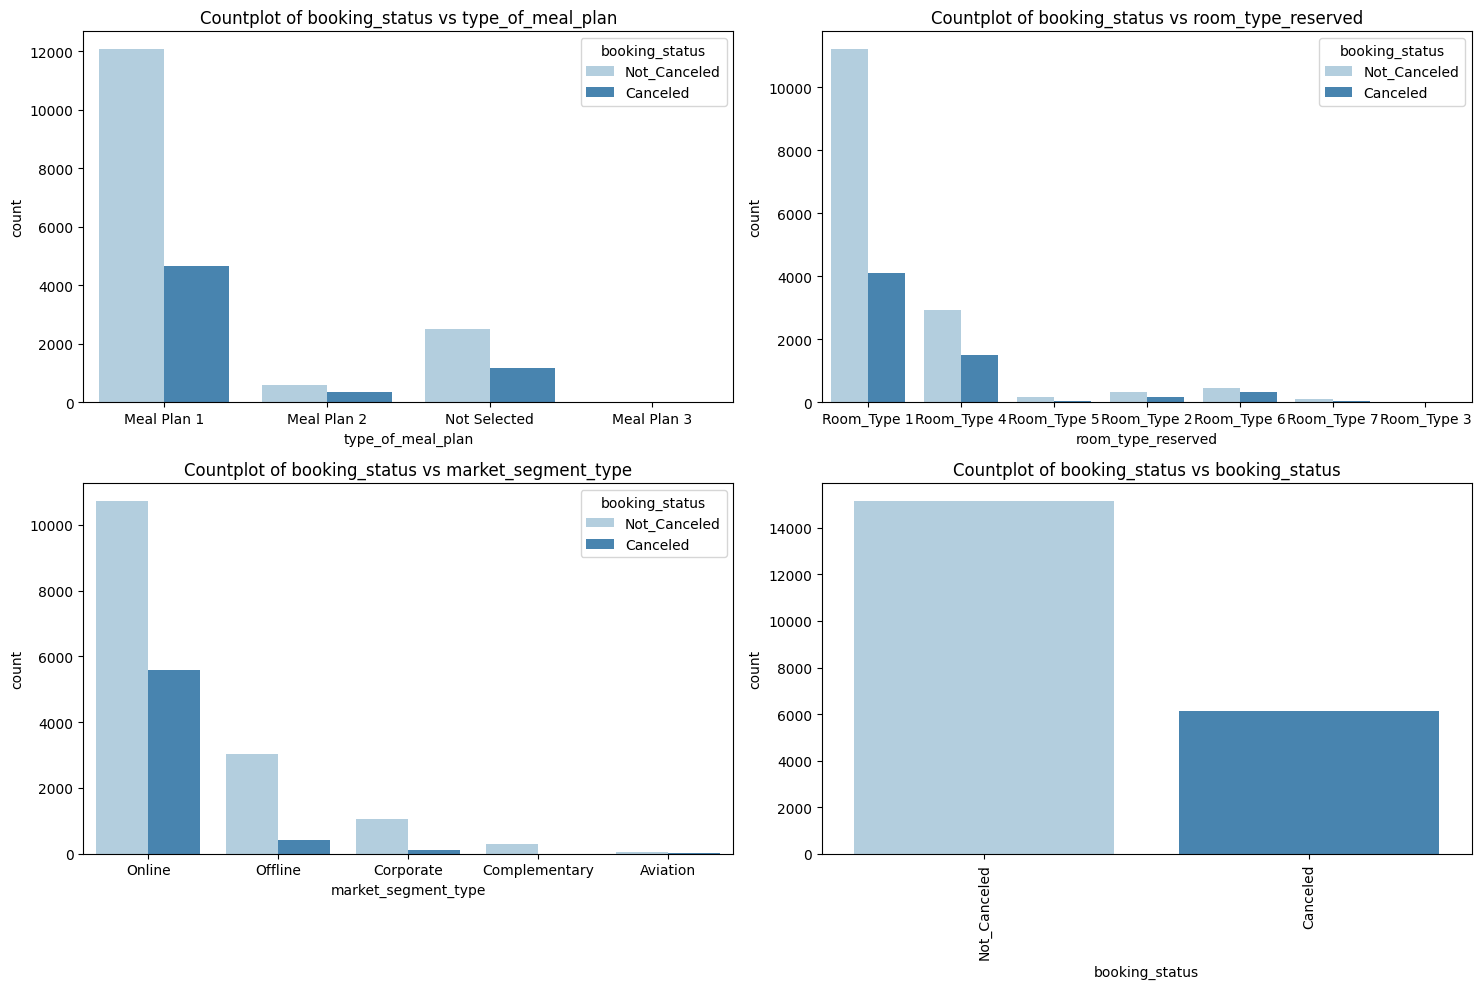

In [26]:
def plot_bivariate_cat(df,target_col,cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1) // 2 
    fig, axis = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axis = axis.flatten()
    for i , column in enumerate(cat_features):
        sns.countplot(data=df,x=column,hue=target_col,ax=axis[i],palette='Blues')
        axis[i].set_title(f'Countplot of {target_col} vs {column}')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
plot_bivariate_cat(df_copy,'booking_status',cat_cols)

<h2> Data Processing

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21328 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21328 non-null  int64  
 1   no_of_children                        21328 non-null  int64  
 2   no_of_weekend_nights                  21328 non-null  int64  
 3   no_of_week_nights                     21328 non-null  int64  
 4   type_of_meal_plan                     21328 non-null  object 
 5   required_car_parking_space            21328 non-null  int64  
 6   room_type_reserved                    21328 non-null  object 
 7   lead_time                             21328 non-null  int64  
 8   arrival_year                          21328 non-null  int64  
 9   arrival_month                         21328 non-null  int64  
 10  arrival_date                          21328 non-null  int64  
 11  market_segment_type 

In [28]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     16724
Not Selected     3659
Meal Plan 2       941
Meal Plan 3         4
Name: count, dtype: int64

Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
mappings = {}
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
print(mappings)
df.head()

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}, 'room_type_reserved': {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}, 'market_segment_type': {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}, 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3,1
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0,1
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2,1


<h3> Multicoliarity

In [31]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\LEARNING\GCP\MLOPS FIRST PROJECT\mygcpenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [33]:
X = add_constant(df)
vif_date = pd.DataFrame()
vif_date["feature"] = X.columns

In [34]:
vif_date

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [35]:
X

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3,1
1,1.0,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0,1
2,1.0,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1,1
3,1.0,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0,0
4,1.0,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29013,1.0,1,0,2,1,0,0,0,4,2018,10,16,4,0,0,0,147.33,0,1
29014,1.0,1,0,1,3,0,0,0,75,2018,3,17,3,0,0,0,70.00,0,0
29016,1.0,2,0,1,3,1,0,0,28,2018,4,11,4,0,0,0,147.25,1,1
29017,1.0,2,0,0,3,3,0,0,37,2018,12,8,4,0,0,0,88.00,0,0


In [36]:
vif_date["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [37]:
vif_date

,feature,VIF
0,const,4.062951e+07
1,no_of_adults,1.334935e+00
2,no_of_children,1.278657e+00
3,no_of_weekend_nights,1.080022e+00
4,no_of_week_nights,1.134511e+00
5,type_of_meal_plan,1.179220e+00
6,required_car_parking_space,1.033016e+00
7,room_type_reserved,1.568520e+00
8,lead_time,1.411580e+00
9,arrival_year,1.288129e+00


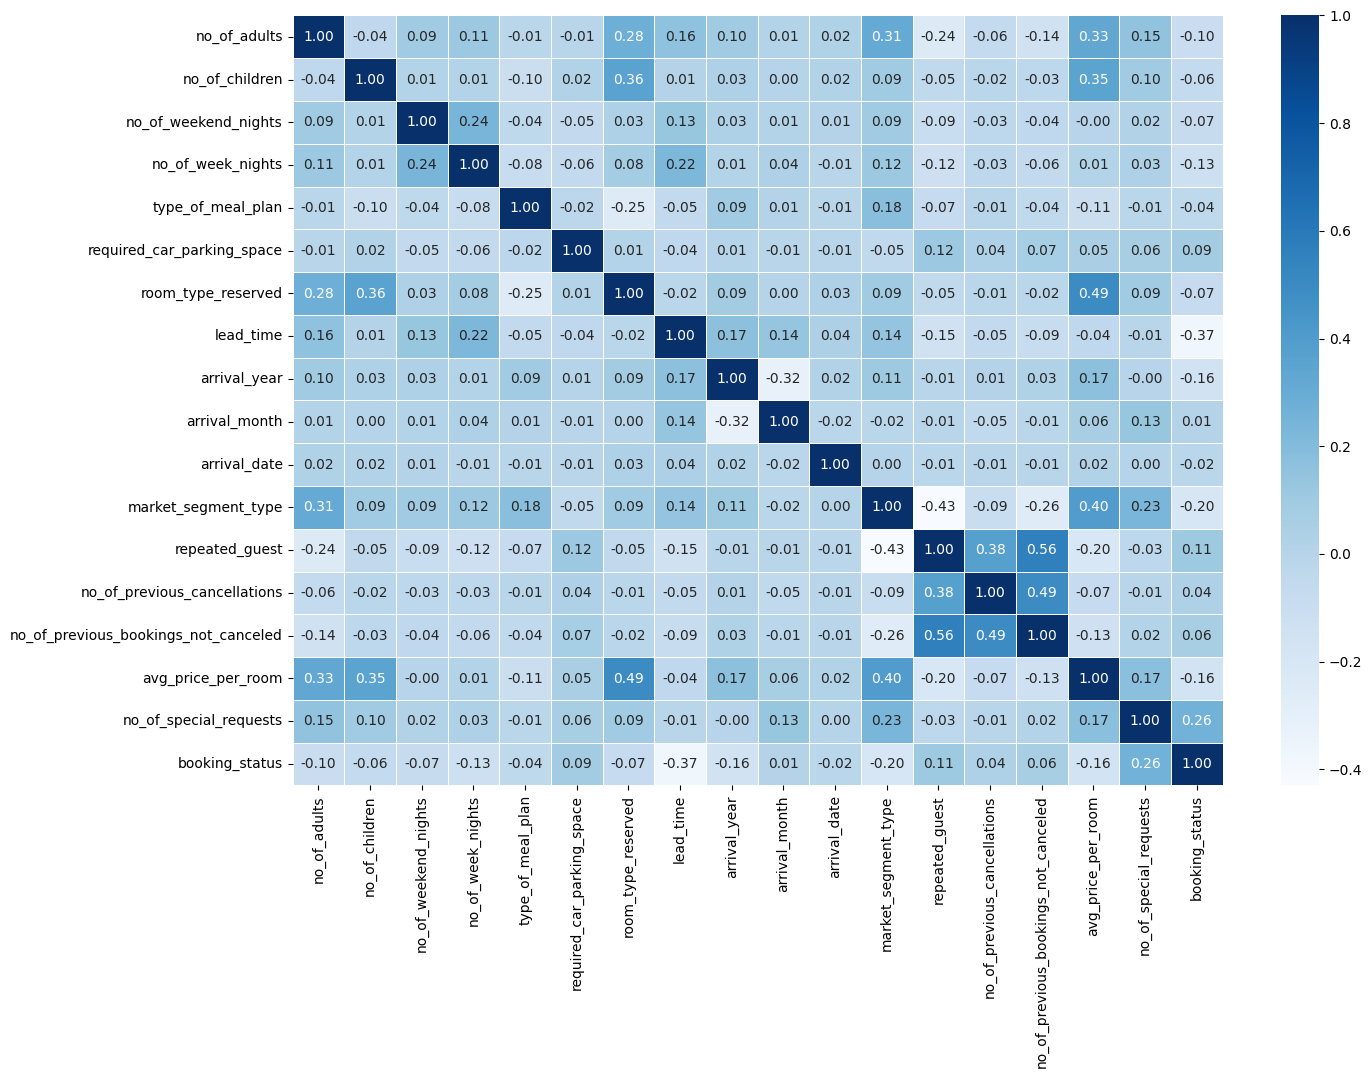

In [38]:
df.corr()
plt.figure(figsize=(15,10))
plt.show(sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues',linewidths=0.5))

 <h3>Check for Skewed Data

In [39]:
skew = df.skew()

In [40]:
skew

no_of_adults                            -0.269723
no_of_children                           4.212876
no_of_weekend_nights                     0.690413
no_of_week_nights                        1.655814
type_of_meal_plan                        1.638384
required_car_parking_space               4.598445
room_type_reserved                       1.378971
lead_time                                1.401160
arrival_year                            -1.935633
arrival_month                           -0.295472
arrival_date                             0.016098
market_segment_type                     -2.359013
repeated_guest                           5.342330
no_of_previous_cancellations            22.323003
no_of_previous_bookings_not_canceled    16.224288
avg_price_per_room                       0.593184
no_of_special_requests                   0.921220
booking_status                          -0.933739
dtype: float64

 <b>These data is skewed </b> <br>
repeated_guest                           5.342330 <br>
no_of_previous_cancellations            22.323003 <br>
no_of_previous_bookings_not_canceled    16.224288 <br>

In [82]:
for col in df.columns:
    if (skew[col]) > 5:
        df[col] = np.log1p(df[col])
        print(f"Applied log transformation to {col}")

Applied log transformation to repeated_guest
Applied log transformation to no_of_previous_cancellations
Applied log transformation to no_of_previous_bookings_not_canceled


In [42]:
skew

no_of_adults                            -0.269723
no_of_children                           4.212876
no_of_weekend_nights                     0.690413
no_of_week_nights                        1.655814
type_of_meal_plan                        1.638384
required_car_parking_space               4.598445
room_type_reserved                       1.378971
lead_time                                1.401160
arrival_year                            -1.935633
arrival_month                           -0.295472
arrival_date                             0.016098
market_segment_type                     -2.359013
repeated_guest                           5.342330
no_of_previous_cancellations            22.323003
no_of_previous_bookings_not_canceled    16.224288
avg_price_per_room                       0.593184
no_of_special_requests                   0.921220
booking_status                          -0.933739
dtype: float64

<h3> Handle Imbalanced data

In [45]:
x = df.drop(columns=['booking_status'])
y = df['booking_status']


In [46]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2


In [47]:
pip install imbalanced-learn

You should consider upgrading via the 'f:\LEARNING\GCP\MLOPS FIRST PROJECT\mygcpenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [48]:
print(y.dtype)
print(y.unique())  # Check if values are like 0, 1 or actual floats
y.value_counts()

int64
[1 0]


booking_status
1    15175
0     6153
Name: count, dtype: int64

In [49]:
y.value_counts()
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

f:\LEARNING\GCP\MLOPS FIRST PROJECT\mygcpenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [50]:
y_resampled.value_counts()

booking_status
1    15175
0    15175
Name: count, dtype: int64

In [51]:
balanced_df = pd.DataFrame(x_resampled, columns=x.columns)
balanced_df['booking_status'] = y_resampled
balanced_df.to_csv('balanced_train.csv', index=False)

x = balanced_df.drop(columns=['booking_status'])
y = balanced_df['booking_status']
x.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2


In [52]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3,1
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0,1
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2,1


In [53]:
balanced_df.shape

(30350, 18)

<h3> Feature selection

In [54]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
model =RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [55]:
feature_importance = model.feature_importances_
feature_importance

array([0.01745494, 0.00679144, 0.02919907, 0.04543368, 0.02146063,
       0.01190088, 0.01889411, 0.26357873, 0.01677915, 0.0882155 ,
       0.0833668 , 0.05363735, 0.00556605, 0.00028396, 0.00299636,
       0.14949729, 0.18494406])

In [56]:
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

In [57]:
feature_importance_df

,Feature,Importance
0,no_of_adults,0.017455
1,no_of_children,0.006791
2,no_of_weekend_nights,0.029199
3,no_of_week_nights,0.045434
4,type_of_meal_plan,0.021461
5,required_car_parking_space,0.011901
6,room_type_reserved,0.018894
7,lead_time,0.263579
8,arrival_year,0.016779
9,arrival_month,0.088216


In [58]:
top_feature_imp_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#top_feature_imp_df = top_feature_imp_df.head(10)
top_feature_imp_df

,Feature,Importance
7,lead_time,0.263579
16,no_of_special_requests,0.184944
15,avg_price_per_room,0.149497
9,arrival_month,0.088216
10,arrival_date,0.083367
11,market_segment_type,0.053637
3,no_of_week_nights,0.045434
2,no_of_weekend_nights,0.029199
4,type_of_meal_plan,0.021461
6,room_type_reserved,0.018894


In [59]:
top_ten_features = top_feature_imp_df['Feature'].head(10).values
top_ten_df = balanced_df[top_ten_features.tolist() + ['booking_status']]


In [60]:
top_ten_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,3,3,90.00,8,23,4,0,1,0,0,1
1,9,0,48.67,2,12,3,2,1,0,3,1
2,24,1,95.20,12,25,4,2,2,0,0,1
3,23,0,127.67,6,21,4,3,0,0,0,0
4,9,2,201.50,9,8,4,2,0,0,3,1


In [61]:
top_ten_df.size

333850

<h3> Model selection

In [62]:
len(top_ten_df.columns)

11

In [ ]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in f:\learning\gcp\mlops first project\mygcpenv\lib\site-packages (2.1.4)



ERROR: Could not find a version that satisfies the requirement loghtgbm (from versions: none)
ERROR: No matching distribution found for loghtgbm
You should consider upgrading via the 'f:\LEARNING\GCP\MLOPS FIRST PROJECT\mygcpenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score , precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [65]:
x = top_ten_df.drop(columns=['booking_status'])
y = top_ten_df['booking_status']

In [66]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [67]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'GaussianNB': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [68]:
metrics = {
    "model": [],
    "accuracy": [],
    "recall": [],
    "precision": [],
    "f1_score": [] 
}

In [69]:
for model_name , classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["model"].append(model_name)
    metrics["accuracy"].append(accuracy)
    metrics["recall"].append(recall)
    metrics["precision"].append(precision)
    metrics["f1_score"].append(f1)

f:\LEARNING\GCP\MLOPS FIRST PROJECT\mygcpenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 12140, number of negative: 12140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 24280, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [70]:
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by='accuracy', ascending=False)
metrics_df.head(10)

,model,accuracy,recall,precision,f1_score
1,Random Forest,0.884514,0.884679,0.884387,0.884533
8,XGBoost,0.875783,0.878418,0.873812,0.876109
9,LightGBM,0.867545,0.876771,0.860886,0.868756
3,Gradient Boosting,0.841021,0.855354,0.831518,0.843268
2,Decision Tree,0.835914,0.824053,0.844077,0.833945
4,AdaBoost,0.808072,0.795717,0.815878,0.805671
0,Logistic Regression,0.784679,0.747611,0.807473,0.776390
7,GaussianNB,0.783361,0.741351,0.809353,0.773861
5,KNN,0.778254,0.684020,0.842875,0.755184
6,SVC,0.735091,0.721582,0.741619,0.731463


<h3> Train our Random Forest model

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier


In [73]:
final_model = RandomForestClassifier(random_state=42)

In [76]:
params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': uniform(0.1, 0.9)
}

In [77]:
random_search = RandomizedSearchCV(final_model,params, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
#----------BEST MODEL------------------#
best_model = random_search.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.8769
Recall: 0.8731
Precision: 0.8798
F1 Score: 0.8765


In [78]:
random_search.best_params_

{'max_depth': 18,
 'max_features': np.float64(0.6308837628044894),
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

<H3>Now save this model

In [81]:
import joblib
joblib.dump(best_model, 'random_forest_best_model.pkl')
loaded_model = joblib.load('random_forest_best_model.pkl')
